In [83]:
import pandas as pd 
import numpy as np
import sklearn

In [4]:
data=pd.read_csv('http://iali.in/datasets/mushrooms.csv')
data

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [124]:
y = data.iloc[:,0]
x = data.iloc[: , 1:23].values


In [125]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
y = labelencoder.fit_transform(data['class'])
y

array([1, 0, 0, ..., 0, 1, 0])

In [127]:
from sklearn.preprocessing import LabelEncoder , OneHotEncoder
le = LabelEncoder()
for i in range(0 , 22):
    x[: , i] = le.fit_transform(x[: , i])

In [128]:
onehotencoder = OneHotEncoder(categorical_features=[i for i in range(0 , 22)])

In [132]:
x = onehotencoder.fit_transform(x).toarray()
x

C:\Users\keval\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)
C:\Users\keval\Anaconda3\lib\site-packages\sklearn\preprocessing\_encoders.py:451: DeprecationWarning: The 'categorical_features' keyword is deprecated in version 0.20 and will be removed in 0.22. You can use the ColumnTransformer instead.
  "use the ColumnTransformer instead.", DeprecationWarning)


array([[0., 1., 1., ..., 0., 1., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.]])

In [133]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y,test_size=0.2)
print("\nX_train:\n")
#print(x_train.head())
print(x_train.shape)

print("\nX_test:\n")
#print(x_test.head())
print(x_test.shape)


X_train:

(6499, 161)

X_test:

(1625, 161)


In [134]:
# from sklearn.preprocessing import StandardScaler 
# sc_x = StandardScaler() 
# x_train = sc_x.fit_transform(x_train) 
# x_test = sc_x.transform(x_test) 

# x_train[0:3]

In [135]:
from sklearn.svm import SVC
classifier = SVC(kernel = 'rbf' , random_state = 0)

In [136]:
classifier.fit(x_train , y_train)

C:\Users\keval\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto_deprecated',
    kernel='rbf', max_iter=-1, probability=False, random_state=0,
    shrinking=True, tol=0.001, verbose=False)

In [139]:
y_pred = classifier.predict(x_test)

In [140]:

from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)

In [141]:
cm

array([[825,   0],
       [  6, 794]], dtype=int64)

In [143]:
from sklearn.metrics import accuracy_score 
print ("Accuracy : ", accuracy_score(y_test, y_pred)) 

Accuracy :  0.9963076923076923


In [145]:
df=pd.DataFrame({'actual':y_test,'Predicted':y_pred})
df

,actual,Predicted
0,0,0
1,0,0
2,0,0
3,1,1
4,1,1
...,...,...
1620,0,0
1621,1,1
1622,1,1
1623,1,1


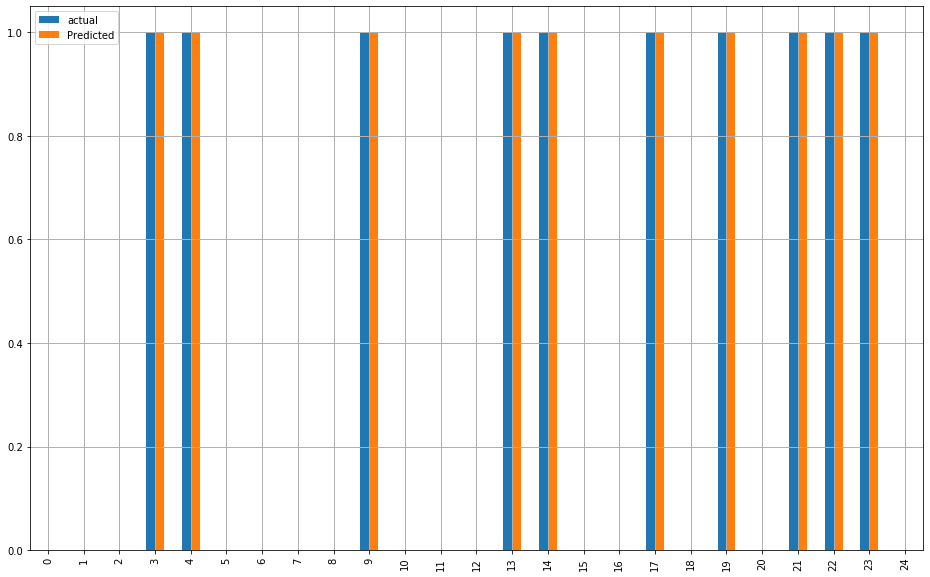

In [148]:
import matplotlib.pyplot as plt
df1=df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major' ,linestyle='-' ,linewidth='1')
plt.grid(which='minor' ,linestyle=':' ,linewidth='1')
plt.show()